<a href="https://colab.research.google.com/github/igor-stefan/disciplina_controle1_EE2021/blob/main/Projeto3_Controle_2021_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control
!pip install tbcontrol
import control as co
import numpy as np
import matplotlib.pyplot as plt
import sympy
from tbcontrol.symbolic import routh

#Item a)
Determinar a faixa de valores do ganho K do sistema em malha fechada, para que o sistema seja estável, instável e marginalmente estável.
O sistema é: $$G(s) = \frac{17.5}{s^2+5.25s+6.25}$$

Em malha fechada:
$$T(s) = \frac{G(s)}{1+G(s)}$$

Portanto:
$$T(s) = \frac{17.5}{s^2+5.25s+23.75}$$

In [ ]:
#define quais variaveis serao utilizadas
s = sympy.Symbol('s')
K = sympy.Symbol('K')

#Iniciando pela malha aberta
C_s = K; #bloco anterior a FT com ganho K
P_s = (17.5) / (s**2 + 5.25*s + 6.25); #bloco principal da FT
G_s = (C_s * P_s) #calcula FT do circuito com a malha aberta

#Fechando a malha
H_s = 1; #bloco da realimentacao
G1_s = sympy.cancel((G_s) / (1 + G_s * H_s)) #função 'cancel' cancela os fatores comuns
print("Malha fechada G1(s) = ", (G1_s),'\n') 

#obtem o denominador da FT malha fechada
numG1_s, denG1_s = sympy.fraction(G1_s)

#tabela de routh
tab_routh = routh(sympy.poly(denG1_s,s))

#resolve as equações para que cada elemento na primeira coluna seja > 0 em relacao a variavel K.
K_estab = sympy.solve([e > 0 for e in tab_routh[:, 0]], K)
print("\nSistema estável se: ", K_estab);

print(" \n\nTabela de Routh:\n")
routh(sympy.poly(denG1_s,s))

Malha fechada G1(s) =  17.5*K/(17.5*K + 1.0*s**2 + 5.25*s + 6.25) 


Sistema estável se:  (-0.357142857142857 < K) & (K < oo)
 

Tabela de Routh:



Matrix([
[          1.0, 17.5*K + 6.25],
[         5.25,             0],
[17.5*K + 6.25,             0]])

#Item b)
Calcular as constantes de erro estático e o erro em regime permanente para as entradas do tipo degrau e rampa unitária. 

#Degrau com amplitude 2.4

In [ ]:
s = sympy.Symbol('s') #para cálculos polinomiais
G_s = (17.5) / (s**2 + 5.25*s + 6.25) #define a função de transferência
degrau_s = 2.4/s #define o degrau com amplitude 2.4
print("G(s) = {}".format(G_s)) #imprime o sistema utilizado

K_v = sympy.limit(G_s, s, 0) #calcula a constante de velocidade
print("\nConstante de velocidade (Kv): ", f'{K_v:.2f}')
erro_rp_degrau = sympy.limit(s * degrau_s / (1 + G_s), s , 0) #calcula o erro em regime permanente com degrau em amplite 2.4
print("\nErro em regime permanente: ", f'{erro_rp_degrau:.3f}') #exibe

G(s) = 17.5/(s**2 + 5.25*s + 6.25)

Constante de velocidade (Kv):  2.80

Erro em regime permanente:  0.632


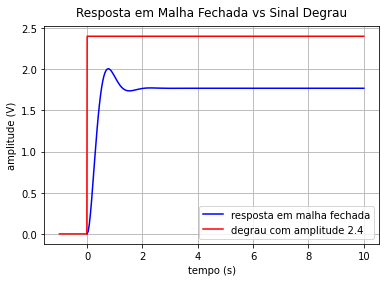

In [ ]:
#cria a função de transferência em malha aberta para simulação
s = co.tf('s') #define variavel s
G_s = (17.5) / (s**2 + 5.25*s + 6.25) #função de transferência
#print("G(s) = {}".format(G_s)) 

#Na malha fechada
T_s = (2.4 * G_s) / (1 + G_s) #coloca a amplitude do degrau por ser constante
t = 10 #tempo de simulacao 10s

#calcula a resposta ao degrau
T_mf, y_mf = co.step_response(T_s, t) 

#calcula um degrau unitário
T2 = np.linspace(-1., t, 1000) #entre -1 e t são colocados 1000 números
degrau = np.ones_like(T2) #cria um array de "uns"
degrau[T2 < 0] = 0 #valores menores que zero recebem 0
degrau[T2 > 0] *= 2.4 #amplitude correta do degrau para o grafico da propria funcao degrau

#plota os resultados
plt.plot(T_mf, y_mf, "b-") #em azul resposta ao degrau
plt.plot(T2, degrau, 'r-') #em vermelho degrau
plt.xlabel('tempo (s)')
plt.ylabel('amplitude (V)')
plt.grid()
plt.legend(['resposta em malha fechada','degrau com amplitude 2.4'])
plt.title("Resposta em Malha Fechada vs Sinal Degrau", pad = 10)
plt.show()


#Rampa unitária

In [ ]:
s = sympy.Symbol('s') #para calculo analitico
G_s = (17.5) / (s**2 + 5.25*s + 6.25) #funcao de transferencia
rampa_s = 1/s**2 #rampa
print("G(s) = {}".format(G_s)) #imprime o sistema utilizado
K_p = sympy.limit(s*G_s, s, 0)
print("\nConstante de posição (Kp): ", K_p)
erro_rp_rampa = sympy.limit(s*rampa_s*(1/ (1 + G_s)) , s , 0) #calcula o erro em regime permanente para rampa na entrada
print("\nErro em regime permanente: {}".format(erro_rp_rampa))

G(s) = 17.5/(s**2 + 5.25*s + 6.25)

Constante de posição (Kp):  0

Erro em regime permanente: oo


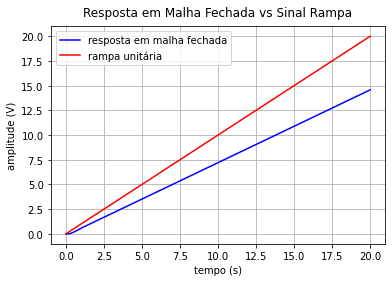

In [ ]:
#cria a função de transferência em malha aberta para simulacao
s = co.tf('s')
G_s = (17.5) / (s**2 + 5.25*s + 6.25)
#print("G(s) = {}".format(G_s))

#Na malha fechada
T_s = (1/s)*(G_s) / (1 + G_s) #ja multiplica pelo degrau, pois a funcao em sequencia calcula a resposta ao degrau
t = 20 #tempo de simulacao 20s

#calcula a resposta ao degrau (neste caso da rampa, pois a FT já foi multiplicada por 1/s)
T_mf, y_mf = co.step_response(T_s, t)

#gera um vetor rampa
T2 = np.linspace(-1., t, 1000) #entre -1 e t são colocados 1000 números
rampa = T2 #atribui o vetor criado à rampa
rampa[T2 < 0] = 0 #valores menores que zero recebem 0 (sao desconsiderados na simulação)

#plota os resultados
plt.plot(T_mf, y_mf, "b-") #em azul a resposta a rampa
plt.plot(T2, rampa, 'r-') #em vermelho a rampa
plt.xlabel('tempo (s)')
plt.ylabel('amplitude (V)')
plt.grid()
plt.legend(['resposta em malha fechada','rampa unitária'])
plt.title("Resposta em Malha Fechada vs Sinal Rampa", pad = 10)
plt.show()